# Lecture 5: Random Numbers & Complex Numbers

Date: 09/14/2017, Thursday

In [1]:
format compact

## Built-in random number generator

`rand` returns a random number between [0,1] (uniform distribution).

In [2]:
rand

ans =
    0.8147


`rand(N)` returns a $N \times N$ random matrix. You can always type `doc rand` or `help rand` to see the detailed usage.

In [3]:
rand(5)

ans =
    0.9058    0.2785    0.9706    0.4218    0.0357
    0.1270    0.5469    0.9572    0.9157    0.8491
    0.9134    0.9575    0.4854    0.7922    0.9340
    0.6324    0.9649    0.8003    0.9595    0.6787
    0.0975    0.1576    0.1419    0.6557    0.7577


`randi(N)` returns an integer between 1 and N.

In [4]:
randi(100)

ans =
    75


`randn` uses normal distribution, instead of uniform distribution.

In [5]:
randn(5)

ans =
   -0.3034   -1.0689   -0.7549    0.3192    0.6277
    0.2939   -0.8095    1.3703    0.3129    1.0933
   -0.7873   -2.9443   -1.7115   -0.8649    1.1093
    0.8884    1.4384   -0.1022   -0.0301   -0.8637
   -1.1471    0.3252   -0.2414   -0.1649    0.0774


## Complex numbers

### Complex number basics

A real number (double-precision) takes 8 Bytes (64 bits). A complex number is a pair of numbers so simply takes 16 Bytes (128 bits)

In [6]:
x = 3;
y = 4;
z = x+i*y;

In [7]:
whos

  Name      Size            Bytes  Class     Attributes

  ans       5x5               200  double              
  x         1x1                 8  double              
  y         1x1                 8  double              
  z         1x1                16  double    complex   



Take conjugate of a complex number:

In [8]:
conj(z)

ans =
   3.0000 - 4.0000i


Show the number on the complex plane

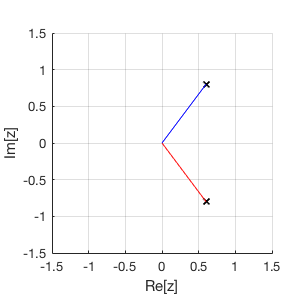

In [9]:
%plot --size 300,300
hold on
complex_number_plot_fn(conj(z)/5,'r') % complex_number_plot_fn is available on canvas.
complex_number_plot_fn(z/5,'b')

3 equivalent ways to compute $|z|$

In [10]:
abs(z)

ans =
     5


In [11]:
sqrt(dot(z,z))

ans =
     5


In [12]:
norm(z)

ans =
     5


The angle of z in degree:

In [13]:
angle(z) / pi * 180.0

ans =
   53.1301


### Euler's Formula

$$
e^{i\theta} = \cos(\theta) + i\sin(\theta)
$$

Verify that MATLAB understands $e^{i\theta}$

In [14]:
theta = linspace(0, 2*pi, 1e4);
z = exp(i*theta); % now z is an array, not a scalar as defined in the previou section.

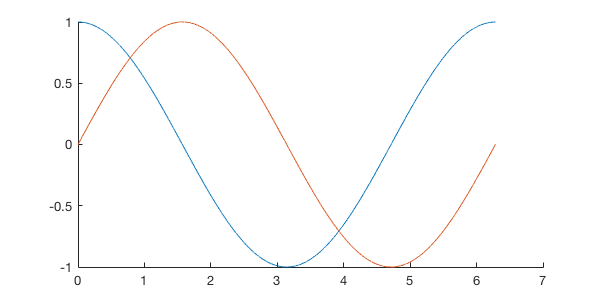

In [15]:
%plot --size 600,300
hold on
plot(theta,real(z))
plot(theta,imag(z))

### Mandelbrot set

#### Iteration with a single parameter

In [16]:
c = rand-0.5 + i*(rand-0.5);

T = 50;
z_arr = zeros(T,1); % to hold the entire time series

z = 0; % initial value
z_arr(1) = z;

for t=2:T
    z = z^2+c;
    z_arr(t) = z;
end

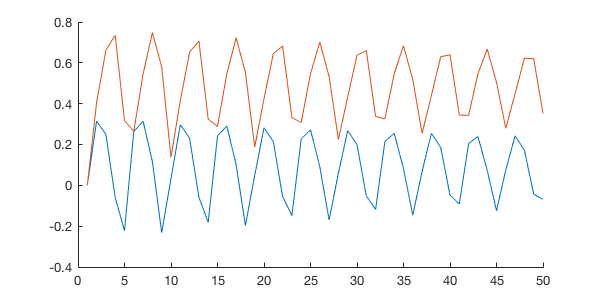

In [17]:
hold on
plot(real(z_arr))
plot(imag(z_arr))

Run this code repeatedly, you will see sometimes $z$ will blow up, sometime not, according to the initial value of $c$. Thus we want to figure out what values of $c$ will make $z$ blow up. 

#### Iteration with the entire paremeter space

We want to construct a 2D array containing all possible values of $c$ on the complex plane. 

Let's make 1D grids first.

In [18]:
nx = 100;
xm = 1.75;
x = linspace(-xm, xm, nx);
y = linspace(-xm, xm, nx);

In [19]:
size(x), size(y)

ans =
     1   100
ans =
     1   100


convert 1D grid to 2D grid.

In [20]:
[Cr, Ci] = meshgrid(x,y);

In [21]:
size(Cr), size(Ci)

ans =
   100   100
ans =
   100   100


In [22]:
C = Cr + i*Ci; % now C spans over the complex plane

In [23]:
size(C)

ans =
   100   100


Run the iteration for every value of C

In [24]:
T = 50;

Z_final = zeros(nx,nx); % to hold last value of z, at all possible points.

for ix = 1:nx
for iy = 1:nx % we also have nx points in the y-direction

    % get the value of c at current point. 
    % note that MATLAB is case-sensitive
    c = C(ix,iy);
    
    z = 0; % initial value, doesn't matter too much
    for t=2:T
        z = z^2+c;
    end
    Z_final(ix,iy) = z; % save the last value of z
    
end
end

Here's one way to visualize the result.

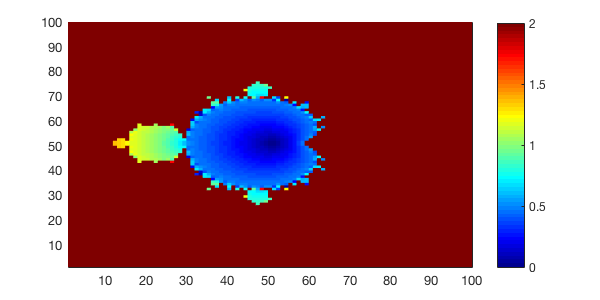

In [25]:
pcolor(abs(Z_final)); % plot the magnitude of z

shading flat; % hide grids
colormap jet; % change colormap
colorbar; % show colorbar

% The default color range is min(z)~max(z),
% but max(z) is almost Inf so we make the range smaller 
caxis([0,2]); 